# Homework 3
## Homework guideline
- The deadline is Nov 20th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [ ]:
%pylab inline 
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


# Q1: K-means clustering (30pt)




In K-means, we are given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$, and we are trying to optimize the distortion value 
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable 
$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$. For each $i$, there is one and only one $j$ such that $r_{ij}=1$, i.e., the membership for $\mathbf{x}^{(i)}$ is unique. 


---


### 1. Alternative optimization Steps (5pt)

Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$, **show** the solution for $r_{ij}$ is 

$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$
Please show your derivation. 


Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$, **show** the solution for $\mu_j$ is  
$$\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$$

Please show your derivation. 



## **Your Answer**:

- When fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$：

For each $i$, there is only one $r_{ij}=1$ on each $j$. Then $\sum_{j=1}^K r_{ij}=1,$
\begin{align}
        \sum_{j=1}^K r_{ij}||\mathbf{x}^{(i)}-\mu_j||^2_2   &\geq \sum_{j=1}^K r_{ij} \cdot \min_{k} ||\mathbf{x}^{(i)}-\mu_k||^2_2 \\
        &=\min_{k}||\mathbf{x}^{(i)}-\mu_k||^2_2 \sum_{j=1}^K r_{ij} \\
        &=\min_{k}||\mathbf{x}^{(i)}-\mu_k||^2_2.
    \end{align}

Equality holds if 
$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_{k} \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$ 

\\

- When fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$:

For each $j$, let
$$\frac{\partial J}{\partial \mu_j}= \sum_{i=1}^N r_{ij}(2\mu_j-2\mathbf{x}^{(i)}) =0$$ 
$$\Leftrightarrow \sum_{i=1}^N (r_{ij}\mu_j-r_{ij}\mathbf{x}^{(i)}) =0$$
$$\Leftrightarrow\left(\sum_{i=1}^N r_{ij}\right)\mu_j = \sum_{i=1}^Nr_{ij}\mathbf{x}^{(i)}$$
$$\Leftrightarrow \mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}.$$ 

K-means clustering can be applied to image compression. Let's explore this with the following image example.

(600, 394, 4)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


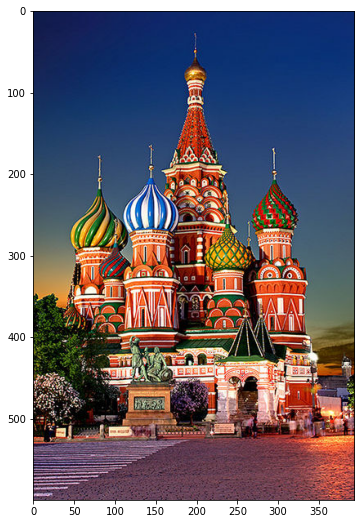

In [ ]:
img = plt.imread('https://github.com/yexf308/MAT592/blob/main/homework/HW3/1-Saint-Basils-Cathedral.png?raw=true')
figure(figsize=(6,9))
imshow(img)
print(img.shape)

print(img[:,:,3])



---


### 2. Prepare data (5pt)
The `img` has the dimension of $600\times 394\times 4$, please reshape it to the matrix with the size of $236400\times 3$. Note the last column `img[:,:,3]` should be ignored since they are all ones. Then the number of features is 3 (which is RGB value) and number of samples of 236400. 

In [ ]:
 #@title  Q1.3 
 # your code starts here
img = delete(img, 3, axis=2)
img = reshape(img, (236400,3))
img.shape


(236400, 3)



---


### 3. Image compression with K-means (20pt)
Use $K=4, 8, 16$ to perform K-means algorithm and replace each row of the matrix `X` RGB value by its closest centroid RGB value. You need to reshape these three matrices back to the images with dimension $600\times 394\times 3$. Please use `imshow` to compare with these images. Please comment your results

/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


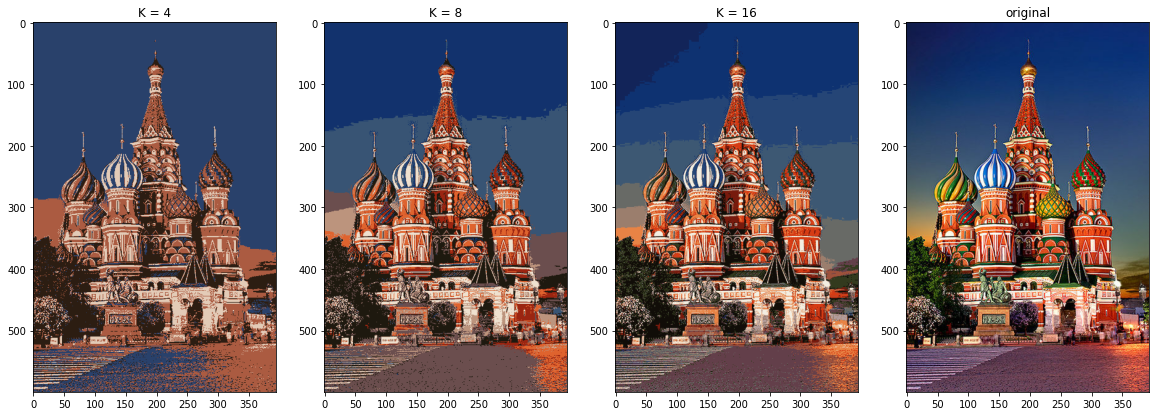

In [ ]:
 #@title  Q1.4
 # your code starts here

def mykmeans(X, K, max_iter=100):
  # step 0
  centroids = X.copy()
  random.shuffle(centroids)
  centroids = centroids[:K]
  
  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = argmin(distances, axis=0)
    centroids_old = centroids
    # step 2
    centroids = array([X[closest==k].mean(axis=0) for k in range(K)])
    # step 3
    if sum(centroids-centroids_old) == 0.:
     # print('Number of iteration is ', i+1)
      break

  return centroids, closest, distortion_list

n_clusters = [4, 8, 16]
fig, axs = plt.subplots(1, 4,figsize=(20,20))
axs = axs.ravel()
for j in range(3):
  K=n_clusters[j]
  centroids, closest, distortion_list=mykmeans(img, K, max_iter=100)  
  X_compress = centroids[closest]
  X_compress = reshape(X_compress, (600, 394, 3))
  axs[j].imshow(X_compress)
  axs[j].title.set_text(f'K = {K}')

img = reshape(img, (600, 394, 3))  
axs[3].imshow(img)
axs[3].title.set_text('original')




# **Your Answer:**



---


### 5. Compression rate (Optional)
What are the compression rates for these three images? Please find a way to estimate them. 

# **Your Answer:**



---


# Q2: Gaussian Mixture Models (40pt)



### 1. KL divergence (5pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$, 
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$. 

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$ 

- $\text{KL}(q||p)=0$ iff $p=q$. 

# **Your Answer:**
\begin{align}
 \text{KL}(q||p) &=-\sum_{z=1}^K q(z) \log\left( \frac{p(z)}{q(z)}\right)  \\ 
& \ge -\log\sum_{z=1}^K q(z) \left( \frac{p(z)}{q(z)}\right) \text{ by Jensen's inequality} \\ 
& =-\log \sum_{z=1}^K p(z) = 0
 \end{align}
 So $\text{KL}(q||p)\ge 0$. The equality holds when $p(z)=cq(z)$ for all $z$ and some constant $c$. If we sum over $z$ on both handside, 
 $$\sum_{z=1}^K p(z) = c\sum_{c=1}^K q(z) $$
 Then $c=1$, which means $p(z)=q(z)$. 

 If $p=q$, then 
 $$\text{KL}(q||p) = -\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{q(z)}\right)=0$$



---


### 2. Construct a function to calculate log likelihood (10pt)
Say you have applied EM algorithm in the Gaussian Mixture model and have found the optimal parameter $\theta^*=\{\pi_c^*, \mu_c^*, \Sigma_c^*\}_{c=1}^K$. Construct a function to calculate the log likelihood $\ell(\theta)$



In [ ]:
 #@title  Q2.2 
 # your code starts here
 def log_likelihood(X,K,Pi_opt,Mu_opt, Sigma_opt):
  N,d = X.shape
  likelihood = zeros((N,K))
  for i in range(N):
    for k in range(K):
      x_m = X[i,:]-Mu_opt[k]
      covariance = Sigma_opt[k]
      pdf = (1. / (sqrt((2 * pi)**d * det(covariance))) * 
            exp(-(solve(covariance, x_m.T).T.dot(x_m.T)) / 2))
      likelihood[i,k] = pdf * Pi_opt[k]
  log_ell = sum(log(sum(likelihood, axis=1)))
  return log_ell

    



---


### 3. Construct a function to calculate Bayesian information criterion (BIC) (5pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. This time we cannot simply use elbow method, instead we will use slightly more complicated criterion, Bayesian information criterion (BIC). 

The formula for BIC in Gaussian mixture models is 
$$\text{BIC}(K) = ( K-1 + Kd+Kd(d+1)/2)\log(N) -\log(\hat\ell) $$

where 
- $d$ is the dimension of observation $\mathbf{x}$, 

- $N$ is the number of observation datapoint,

- $\hat\ell$ is the maximized value of the likelihood function of the model, which is the likelihood at the optimal paramter, $\ell(\theta^*)$. 

Note models with lower BIC are generally preferred. 

Please construct a function to calculate the Bayesian information criterion. 


In [ ]:
 #@title  Q2.3 
 # your code starts here
def BIC(K,d,N,log_ell_hat):
  return (K-1+K*d+K*d*(d+1)/2)*np.log(N)-log_ell_hat



---


### 4. Testing with the synthetic dataset (20pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with differnt random initial conditions, to make sure the parameter is not trapped in the local minimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$. 

(It is always a good habit to start your code for some special $K$, say $K=4$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )


<Figure size 432x288 with 0 Axes>

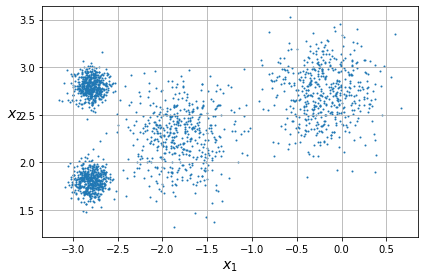

In [ ]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()  
    plt.show()     


if 1:
    blob_centers = np.array(
        [[ -0.2,  2.75],
         [-1.8 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8]])
    blob_std = np.array([0.3, 0.3, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7) 

figure()
plot_clusters(X)       

In [ ]:
 #@title  Q2.4 
 # your code starts here
  #@title  Q2.4 
 def euclidean_distance(x1, x2):
    return sqrt(sum((x1 - x2) ** 2))
    
# initialization for Kmeans++ algorithm
def initialization(X, K):
    
    ## Step 1: initialize the centroids list and add
    ## a randomly selected data point to the list
    n_samples, n_features = X.shape
    random_sample_idxs = random.choice(n_samples, 1, replace=False)
    centroids = X[random_sample_idxs,:]

    ## compute remaining K - 1 centroids
    for c_id in range(K - 1):
        ## Step 2: initialize a list to store distances of data
        ## points from nearest centroid 
        ## compute distance of 'point' from each of the previously
        ## selected centroid and store the minimum distance
        dist = zeros(n_samples)
        for idx, sample in enumerate(X):
          distances     = [euclidean_distance(sample, point) for point in centroids]
          dist[idx]     = min(distances)

        ## Step 3: select data point with maximum distance as our next centroid  
        next_centroid = X[argmax(dist), :]
        centroids=vstack([centroids,next_centroid])

    return centroids

def initialize(X, K, centroids):
    # N has the number of rows while d has the number of columns of dataset X 
    N, d = X.shape 

    # initial weights given to each cluster are stored in phi or P(Ci=j)
    Pi = full(shape=K, fill_value=1/K) 

    # initial weights given to each data point wrt to each cluster or P(Xi|Zi=j)
    weights = full(shape=(N,d), fill_value=1/K)
        

    # initial value of mean of K Gaussians 
    Mu = [  centroids[i,:] for i in range(K) ] 
    # initial value of covariance matrix of K Gaussians
    Sigma = [ cov(X.T) for _ in range(K) ] 
    # theta =(Mu,Sigma,Pi)
    return Pi, Mu, Sigma, weights

# multivariate normal distribution for one instance and multiple features
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m.T).T.dot(x_m.T)) / 2))

# computer posterior probability of each data point wrt each cluster
# parameters are Pi, Mu, Sigma
def predict_posterior(X, K, Pi, Mu, Sigma):
    N,d = X.shape
    # Creates a N*K matrix denoting probability of each point wrt each cluster 
    likelihood = zeros( (N, K) )
    for i in range(K):
      for j in range(N):
        distribution = multivariate_normal(X[j,:], d, Mu[i], Sigma[i])
            # pdf : probability denisty function
        likelihood[j,i] = distribution * Pi[i]
    numerator = likelihood
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights


# E-Step: update weights holding Pi Mu Sigma constant
def e_step(X, K, Pi, Mu, Sigma):
    # updated weights(i,c)=P(Zi=c|Xi)
    weights   = predict_posterior(X, K, Pi, Mu, Sigma)
    return weights


# M-Step: update Mu, Sigma, Pi, holding weights constant
def m_step(X, K, weights):
    # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster Pi_c
    Pi_update = weights.mean(axis=0)  
    Mu_update = [[] for _ in range(K)]
    Sigma_update = [[] for _ in range(K)]
    for i in range(K):
        weight_i = weights[:, [i]]
        total_weight = weight_i.sum()
        Mu_update[i]    = (X * weight_i).sum(axis=0) / total_weight
        Sigma_update[i] = cov(X.T, aweights=(weight_i/total_weight).flatten(), bias=True)  

    return Pi_update, Mu_update, Sigma_update    
    
# predict function 
def predict(X, K, Pi, Mu, Sigma):
   weights = predict_posterior(X, K, Pi, Mu, Sigma)
   # datapoint belongs to cluster with maximum probability
   # returns this value
   return argmax(weights, axis=1)

def GMM_fit(X, K,centroids, max_iter=100, threshold =0.001):
  # initialise parameters like weights, Pi, Mu, Sigma of all Gaussians in dataset X
  #step 1
  Pi, Mu, Sigma, weights = initialize(X,K,centroids)
  for j in range(max_iter):
    z = predict(X, K, Pi, Mu, Sigma)
    Mu_array = array(Mu)
    # Step 2 iterate to update the value of P(Xi/zi=j)
    weights = e_step(X, K, Pi, Mu, Sigma)
    Pi_old  = Pi;
    Mu_old  = Mu;
    # Step 3 iterate to update the value of Mu, Sigma and Pi as the clusters shift
    Pi, Mu, Sigma  = m_step(X, K, weights)

  # for stopping
    distances = [ norm(Mu[i] - Mu_old[i]) for i in range(K)] 
    print(sum(distances))
    if sum(distances) < threshold:
      print('Number of iteration is ', j+1)
      break

  z = predict(X, K, Pi, Mu, Sigma)
  Mu_array = array(Mu)

  return z, Pi, Mu, Sigma 

1.4377086671539532
0.14985676907724496
0.15568496649742844
0.15255534497426188
0.1300872550716753
0.09443547639708813
0.10696107431439117
0.06201132591695433
0.027472075790419243
0.014045219729695918
0.006454428045000444
0.0028612409092384
0.0012564895449880755
0.0005499953066762248
Number of iteration is  14
2.696711996737874
0.32615855587272613
0.17646373382590086
0.1602329807354334
0.11281298187589056
0.07719874222454323
0.06393000592560348
0.05368631378123739
0.03139687396172774
0.011590927136245975
0.005785083293105619
0.00298850778379124
0.0014811997184404173
0.0007122244032410704
Number of iteration is  14
3.4146132798059643
0.43479049515422574
0.49435587129396996
0.464312102213034
0.37781057110184724
0.276650067586654
0.15792872134378283
0.08065874491362712
0.04081051510682232
0.036514887019836025
0.04060207231045345
0.0478428227038707
0.0561232386104834
0.06426918950080991
0.07164559440356032
0.07711811889502423
0.08495545255042256
0.10281442422375878
0.1076458775299546
0.0995

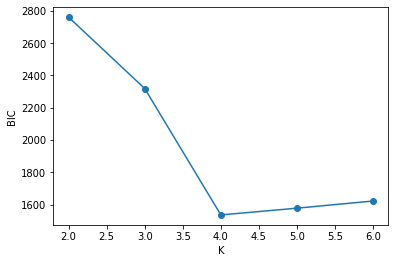

In [ ]:
BICs = []
Ks= []
for k in range(2,7):
   
  Ks.append(k)
  N,d = X.shape
  centroids=initialization(X,k)
  z, Pi, Mu, Sigma = GMM_fit(X,k,centroids)
  log_ell_hat = log_likelihood(X, k, Pi, Mu, Sigma)
  bic = BIC(k,d,N,log_ell_hat)
  BICs.append(bic)

fig, ax = plt.subplots()
ax.scatter(Ks, BICs)
ax.plot(Ks, BICs)
ylabel('BIC')
xlabel('K')
plt.show()


# **Your Answer:**



---


# Q3: Eigenfaces (30pt)

In this problem, we use PCA to reduce the dimension of raw face images. Here we load the data `face.mat` and we will have the variable `X` of size $(400, 112,92)$. Each image is in gray scale and has $112\times 92$ pixels. We will perform principle component analysis to this dataset.

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW3/face.mat?raw=true -O face.mat

--2021-11-23 04:33:11--  https://github.com/yexf308/MAT592/blob/main/homework/HW3/face.mat?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW3/face.mat [following]
--2021-11-23 04:33:11--  https://github.com/yexf308/MAT592/raw/main/homework/HW3/face.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW3/face.mat [following]
--2021-11-23 04:33:11--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW3/face.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting resp

(400, 112, 92)


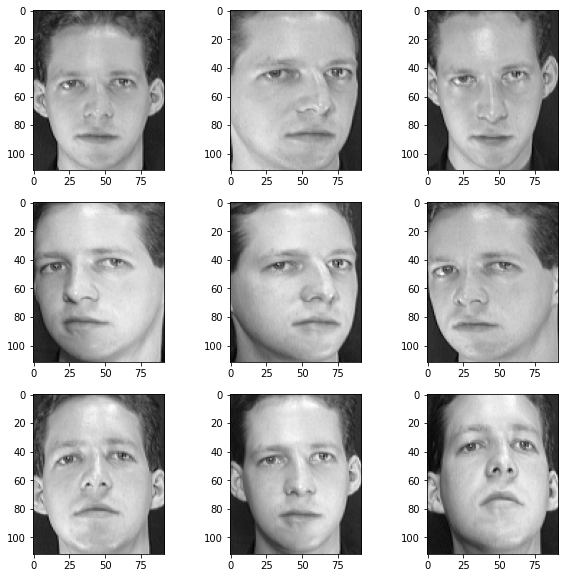

In [ ]:
data = loadmat('face.mat')
X= data['X']
print(X.shape)
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(X[i], cmap='gray')



---


### 1. Prepare data (5pt)
You need to reshape each of the image into a row vector. So the data matrix should have the size of $400\times 10304$. 

In [ ]:
 #@title  Q3.1 
 # your code starts here
X_ori = X
X = reshape(X, (400, 10304))
X.shape

 #subtract mean
X_mean = np.mean(X, axis=0)
X = X - X_mean



---


### 2. Principle component analysis (15pt)
Apply the principle component analysis on the dataset and **plot the singular values**. Please comment on your findings. Each eigenvector has the same dimensionality as the original images, and thus can itself be seen as an image. These eigenvectors (after reshaping into $112\times 92$ pixels) are therefore called **Eigenfaces**. Please **plot the first nine eigenfaces** which corresponding the top nine singular values. Comment on your findings. 


/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


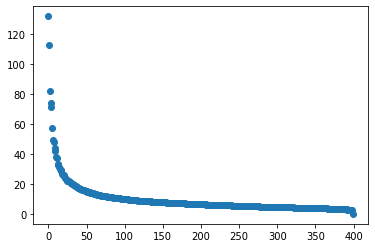

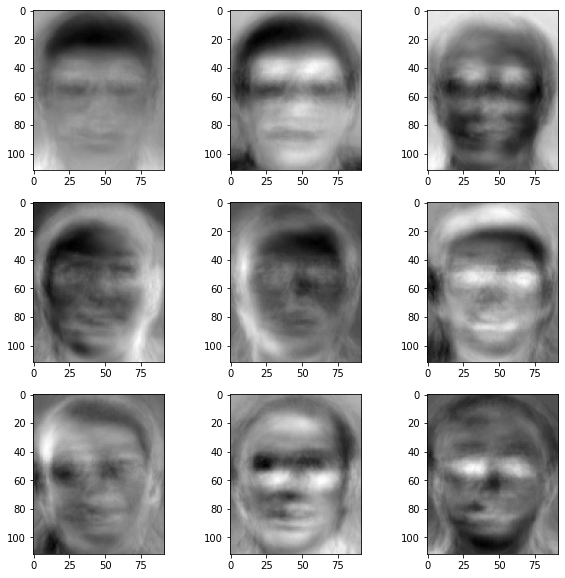

In [ ]:
 #@title  Q3.2 
 # your code starts here
u, s, vh =svd(X, full_matrices=False)
scatter(arange(400), s);

PC = vh[:9,:] # top 9 PCs
PC_image = reshape(PC, [9, 112,92])
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(PC_image[i], cmap='gray');

# **Your Answer:**



---


### 3. Image compression (10pt)
Please use top 150 principle components (Eigenfaces) to reconstruct all 400 images. This compress the whole dataset at once. Pick any image after the compression and visualize it. Show the effect of PCA by
comparing the original image and the PCA images side by side using subplot. Comment on your findings. 

/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


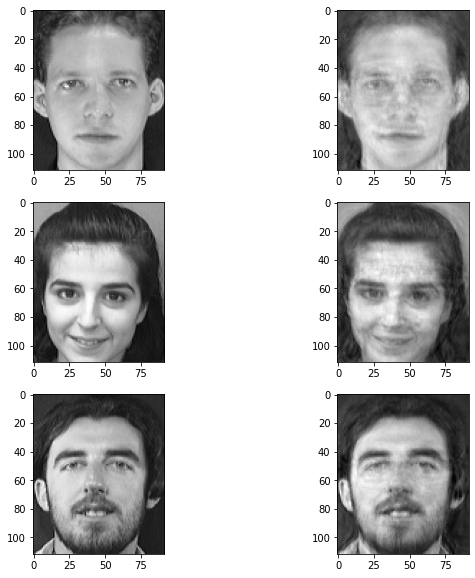

In [ ]:
 #@title  Q3.3
 # your code starts here

projected_X = dot(u[:,:150]*s[:150],vh[:150,:])+X_mean 
projected_Xtr=reshape(projected_X , [400, 112,92])
fig, axs = plt.subplots(3, 2,figsize=(10,10))
axs = axs.ravel()
for i in range(3):
  axs[2*i].imshow(X_ori[10*i], cmap=pyplot.get_cmap('gray')) #left one is the original picture
  axs[2*i+1].imshow(projected_Xtr[10*i], cmap=pyplot.get_cmap('gray')) # right one is the approximated one with top 200 PC. 


# **Your Answer:**